
      策略绩效摘要
------------------------------
    年化收益: 99.79%
    年化波动: 3.96%
    夏普比率: 25.17
    最大回撤: -0.07%



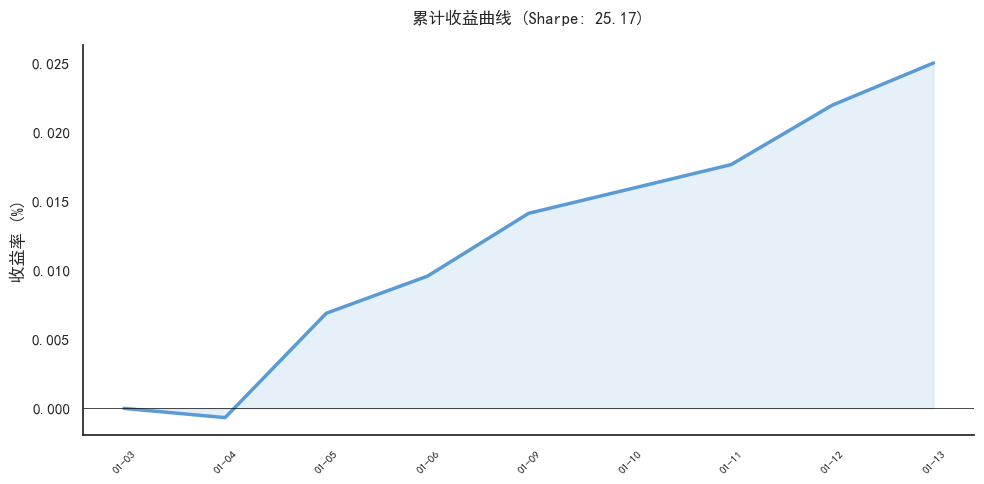

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

# ==========================================
# 1. 分析函数：计算核心量化指标
# ==========================================
def analyze_backtest(df):
    """
    计算累计收益、年化指标、回撤等
    """
    df = df.copy()
    df.index = pd.to_datetime(df.index)
    # 总资产 = 现金 + 保证金
    df['total'] = df['cash'] + df['security']
    # 计算每日收益率与累计收益
    df['return'] = df['total'].pct_change().fillna(0)
    df['cum_return'] = (1 + df['return']).cumprod() - 1
    # 计算动态回撤
    df['drawdown'] = (df['total'] / df['total'].cummax()) - 1
    
    # 核心绩效指标 (假设252个交易日)
    total_ret = df['cum_return'].iloc[-1]
    ann_ret = (1 + total_ret) ** (252 / len(df)) - 1
    ann_vol = df['return'].std() * np.sqrt(252)
    sharpe = ann_ret / ann_vol if ann_vol != 0 else 0
    max_dd = df['drawdown'].min()
    
    metrics = {
        "年化收益": ann_ret,
        "年化波动": ann_vol,
        "夏普比率": sharpe,
        "最大回撤": max_dd
    }
    return df, metrics

# ==========================================
# 2. 可视化函数：逐张生成精美图表
# ==========================================
def visualize_backtest(df, metrics):
    """
    分步出图：收益曲线、资产构成、回撤图
    """
    sns.set_theme(style="white", font="SimHei")
    # 精简日期显示
    dates = [d.strftime('%m-%d') for d in df.index]
    
    # 莫兰迪色系：商务蓝、珊瑚红、浅灰
    C_BLUE, C_SOFT_RED, C_GRAY = "#5B9BD5", "#FF8C8C", "#E7E6E6"

    # 图 1: 累计收益曲线
    plt.figure(figsize=(10, 5))
    plt.plot(dates, df['cum_return'], color=C_BLUE, lw=2.5, label='累计收益率')
    plt.fill_between(dates, df['cum_return'], color=C_BLUE, alpha=0.15)
    plt.axhline(0, color='black', lw=0.5)
    plt.title(f"累计收益曲线 (Sharpe: {metrics['夏普比率']:.2f})", pad=15)
    plt.ylabel("收益率 (%)")
    plt.tick_params(axis='x', rotation=45, labelsize=8)
    sns.despine()
    plt.tight_layout()
    plt.show()

# ==========================================
# 3. 运行部分：模拟数据并启动流程
# ==========================================
if __name__ == "__main__":
    # 模拟读入你的数据 (实际运行时替换为你的 DataFrame)
    raw_data = {
        'cash': [2013650.709, 2013628.993, 2026003.84, 2031471.909, 2042625.619, 2046311.969, 2058009.687, 2069840.009, 2072893.648],
        'security': [1002657.6, 1000658.4, 1011096.8, 1013736, 1016321.6, 1017945.6, 1011572.8, 1012737.6, 1018899.84]
    }
    dates = ["2023-01-03", "2023-01-04", "2023-01-05", "2023-01-06", "2023-01-09", "2023-01-10", "2023-01-11", "2023-01-12", "2023-01-13"]
    df_test = pd.DataFrame(raw_data, index=pd.to_datetime(dates))

    # 执行分析
    res_df, final_metrics = analyze_backtest(df_test)

    # 打印摘要
    print("\n" + "="*30)
    print("      策略绩效摘要")
    print("-" * 30)
    for k, v in final_metrics.items():
        if "比率" in k:
            print(f"{k:>8}: {v:.2f}")
        else:
            print(f"{k:>8}: {v:.2%}")
    print("="*30 + "\n")

    # 执行可视化
    visualize_backtest(res_df, final_metrics)